## **Aligned Analysis**

In [7]:
import pyvista as pv
import os

data_path = '../toothForge/data/laplace/aligned-brains'

plotter = pv.Plotter(shape=(8, 9), window_size=(1000, 1200))
i = 0

for root, dirs, files in os.walk(data_path):
    for folder in sorted(dirs):
        

        mesh = pv.read(os.path.join(root, folder, 'reconstructed_aligned.stl'))
        

        row = i // 9
        col = i % 9
        plotter.subplot(row, col)
        plotter.add_mesh(mesh, opacity=1, color='lightslateblue')
        i += 1

        plotter.camera_position = [
                        (-1, 0, 0),  
                        (0, 0, 0),   
                        (0, 0, 1)    
        ]
        plotter.reset_camera()

plotter.show()

Widget(value='<iframe src="http://localhost:46787/index.html?ui=P_0x795cbd0dfa90_1&reconnect=auto" class="pyvi…

### **Eigenvectors**

In [2]:
%run '../toothForge/src/Graph.py'

In [25]:
import os
import numpy as np
import h5py
import pyvista as pv
import trimesh
from matplotlib import pyplot as plt

data_path = '../toothForge/data/laplace/aligned-brains'

plotter = pv.Plotter(shape=(8, 9), window_size=(1000, 1200))
i = 0

for root, dirs, files in os.walk(data_path):
    for folder in sorted(dirs):
        
        stl_path = os.path.join(root, folder, 'reconstructed_aligned.stl')
        tmesh = trimesh.load(stl_path, force='mesh')
        graph = Graph(tmesh, k=100)
        _, evecs, _, _ = graph.apply_decomposition()

        jet_cmap = plt.get_cmap('jet')

        eigenmodes_m_sliced = evecs[:, 0]
        eigenmodes_m_n = (eigenmodes_m_sliced - np.min(eigenmodes_m_sliced)) / (np.max(eigenmodes_m_sliced) - np.min(eigenmodes_m_sliced))
        clrs_m = (jet_cmap(eigenmodes_m_n)[:, :3] * 255).astype(np.uint8)
        
        row = i // 9
        col = i % 9
        plotter.subplot(row, col)
        plotter.add_mesh(tmesh, scalars=clrs_m, rgb=True)
        
        i += 1
        if i >= 90:
            break

        plotter.camera_position = [
                            (-1, 0, 0), 
                            (0, 0, 0), 
                            (0, 0, 1)   
        ]
        plotter.reset_camera()


plotter.show()



Widget(value='<iframe src="http://localhost:45229/index.html?ui=P_0x7f18d3fab280_21&reconnect=auto" class="pyv…

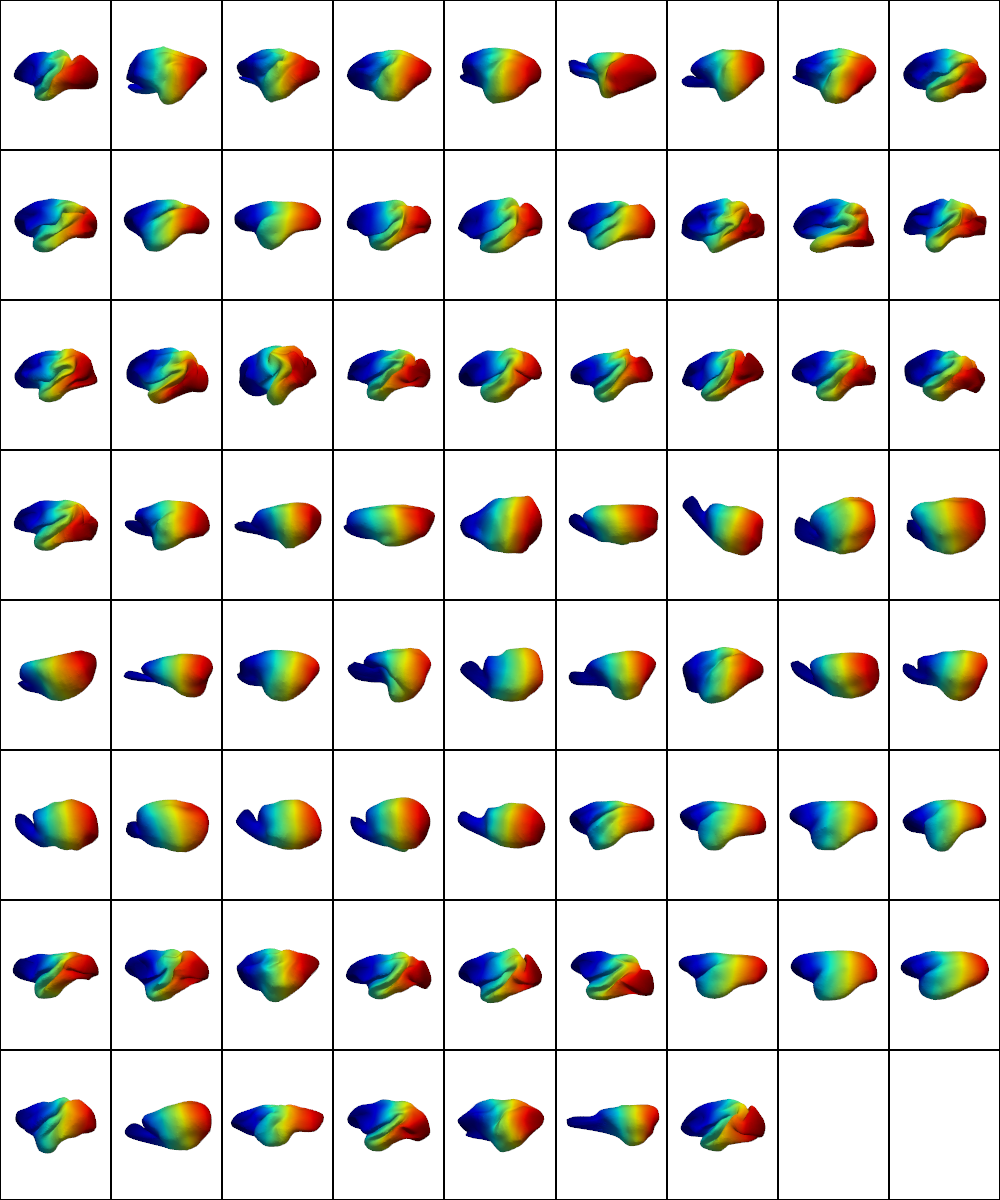

In [28]:
import os
import numpy as np
import h5py
import pyvista as pv
import trimesh
from matplotlib import pyplot as plt

data_path = '../toothForge/data/laplace/aligned-brains'

plotter = pv.Plotter(shape=(8, 9), window_size=(1000, 1200))
i = 0

for root, dirs, files in os.walk(data_path):
    for folder in sorted(dirs):
        
        stl_path = os.path.join(root, folder, 'reconstructed_aligned.stl')
        tmesh = trimesh.load(stl_path, force='mesh')
        graph = Graph(tmesh, k=100)
        _, evecs, _, _ = graph.apply_decomposition()

        jet_cmap = plt.get_cmap('jet')

        eigenmodes_m_sliced = evecs[:, 3]
        eigenmodes_m_n = (eigenmodes_m_sliced - np.min(eigenmodes_m_sliced)) / (np.max(eigenmodes_m_sliced) - np.min(eigenmodes_m_sliced))
        clrs_m = (jet_cmap(eigenmodes_m_n)[:, :3] * 255).astype(np.uint8)
        
        row = i // 9
        col = i % 9
        plotter.subplot(row, col)
        plotter.add_mesh(tmesh, scalars=clrs_m, rgb=True)
        
        i += 1
        if i >= 90:
            break

        plotter.camera_position = [
                            (-1, 0, 0), 
                            (0, 0, 0), 
                            (0, 0, 1)   
        ]
        plotter.reset_camera()


plotter.show()



Widget(value='<iframe src="http://localhost:45229/index.html?ui=P_0x7f184ff10820_24&reconnect=auto" class="pyv…

#### Exporting mesh pictures

In [115]:
import pyvista as pv
import os

data_path = '../toothForge/data/laplace/aligned-brains'

for root, dirs, files in os.walk(data_path):
    for folder in sorted(dirs):
        
        mesh = pv.read(os.path.join(root, folder, 'reconstructed_aligned.stl'))
        plotter = pv.Plotter(off_screen=True)
        plotter.add_mesh(mesh, color='mediumaquamarine')

        plotter.camera_position = [
                        (-1, 0, 0),  
                        (0, 0, 0),   
                        (0, 0, 1)    
        ]
        plotter.reset_camera()
        
        plotter.screenshot(f"{os.path.join(data_path, folder)}/thumbnail.png", transparent_background=True)
        plotter.close()


## **Aligned coefficients**

In [3]:
import h5py
data_path = '../toothForge/data/laplace/aligned-brains'
import os 

coefficients = [] # k x 3
names = []
thumbnails = []

for root, dirs, files in os.walk(data_path):
    for folder in dirs:
        c_file = h5py.File(os.path.join(root, folder, 'spec_coeff.h5'))
        c = c_file['c'][()]
        
        if folder != 'template-sub-001_species-Cercopithecus+cephus_hemi-L':
            r_file = h5py.File(os.path.join(root, folder, 'spec_rotation.h5'))
            r = r_file['R'][()]
            c = r @ c
            
        coefficients.append(c)
        names.append(folder)
        thumbnails.append(os.path.join(root, folder, 'thumbnail.png'))


## **Principal Component Analysis PCA**

### ***2D***

In [4]:
import numpy as np
from sklearn.decomposition import PCA

# Flatten coefficient matrices
flattened_c = [mat.flatten() for mat in coefficients] # k x n

X = np.array(flattened_c)

pca = PCA(n_components=2)
X_flattened = pca.fit_transform(X)

X_flattened

array([[ 20.73567822,  -1.93269528],
       [ -3.43981999,   0.8640779 ],
       [ 12.83400584,  -5.52191431],
       [-14.70749718,  -2.85801677],
       [  5.68825738,  -2.62654945],
       [ -6.81566202,  10.47248355],
       [  2.05575151,  -9.84849983],
       [  8.58287482,   4.96072214],
       [ 12.12982054, -11.95783897],
       [ 15.25134575,  -9.80009118],
       [ -2.05574434,  -8.98556162],
       [ 13.37470301,   9.87056643],
       [ -2.54322598,  -3.89223276],
       [  8.28944072,  -4.72498232],
       [-17.74036048,   0.056137  ],
       [ 11.14532955,   3.49188823],
       [ -4.89326915,   0.8466806 ],
       [  1.86746549,  -8.36468419],
       [-23.23396168,  -1.36402972],
       [ 10.2438143 ,   1.59363703],
       [ -6.90155282, -13.07421968],
       [ 10.08540808,   8.62827923],
       [  5.73393062, -12.71984989],
       [  8.6983512 ,   5.81022374],
       [-41.36720747,   3.89420243],
       [  2.57755119,  14.49207273],
       [ 21.09456771,   8.14935657],
 

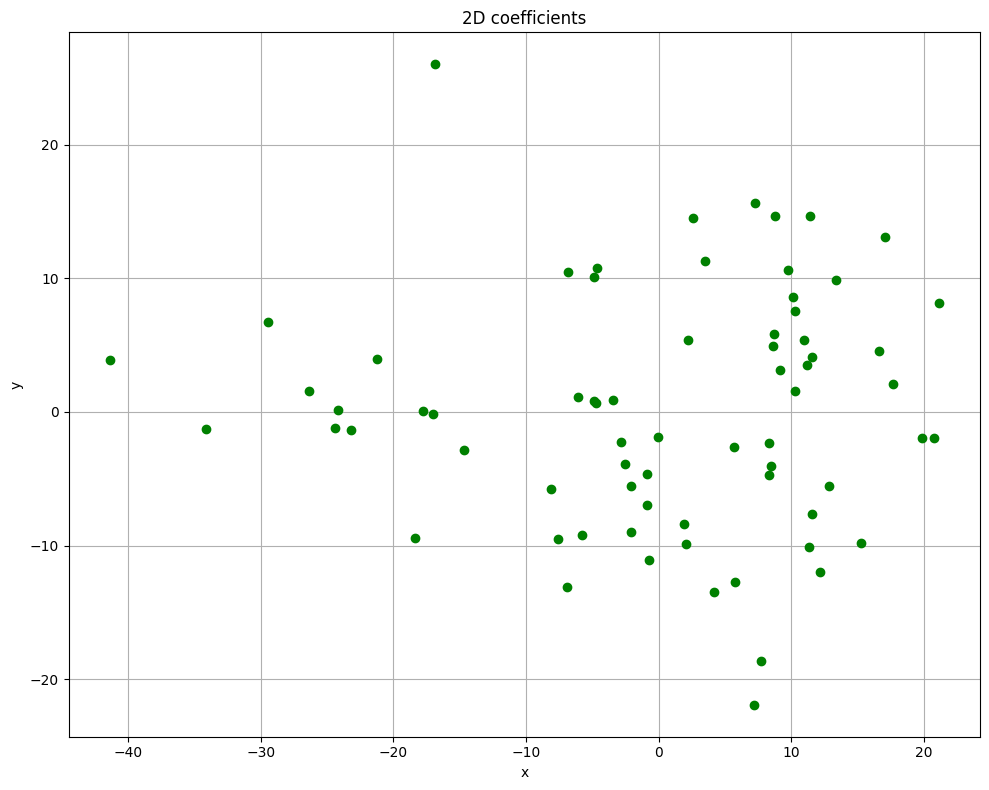

In [5]:
from matplotlib import pyplot as plt

#%matplotlib widget

x = X_flattened[:, 0]
y = X_flattened[:, 1]
#z = X_flattened[:, 2]

fig = plt.figure(figsize=(10, 8))

plt.plot(x, y, color="green", marker='o', linestyle='')

plt.title("2D coefficients")
plt.xlabel("x")
plt.ylabel("y")

plt.grid(True)
plt.tight_layout()
plt.show()

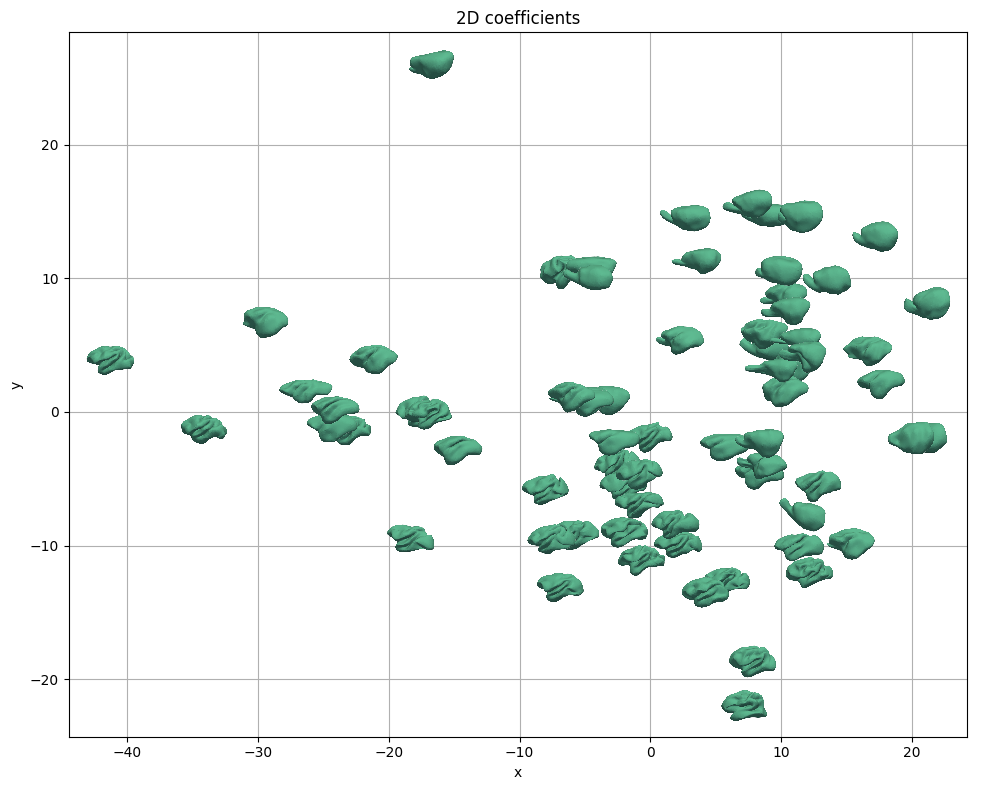

In [6]:
from matplotlib import pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

#%matplotlib widget

x = X_flattened[:, 0]
y = X_flattened[:, 1]

fig, ax = plt.subplots(figsize=(10, 8))

plt.plot(x, y, color="red", marker='o', linestyle='')

ax.set_title("2D coefficients")
ax.set_xlabel("x")
ax.set_ylabel("y")

for xi, yi, thumbnail in zip(x, y, thumbnails):
    img = mpimg.imread(thumbnail)
    imagebox = OffsetImage(img, zoom=0.06)
    ab = AnnotationBbox(imagebox, (xi, yi), frameon=False)
    ax.add_artist(ab)
    

ax.grid(True)
plt.tight_layout()
plt.show()

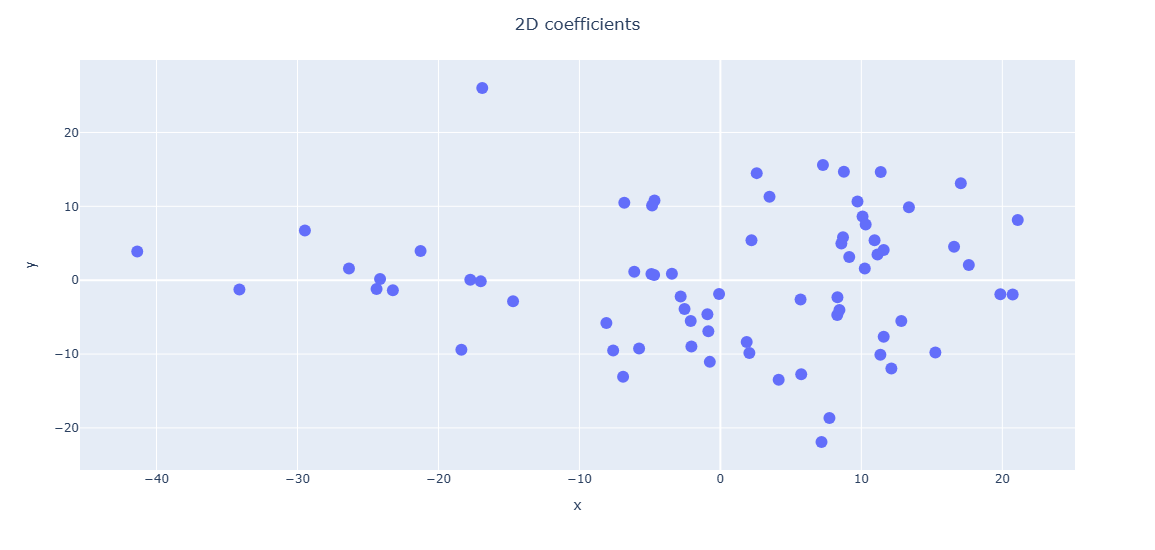

In [7]:
import plotly.express as px

fig = px.scatter(x=X_flattened[:, 0], y=X_flattened[:, 1], width=800, height=550)

fig.update_layout(title_text='2D coefficients', title_x=0.5)

fig.update_traces(marker=dict(size=12),
                 selector=dict(mode='markers'))
fig.show()

### ***3D***

In [4]:
import numpy as np
from sklearn.decomposition import PCA

# Flatten coefficient matrices
flattened_c = [mat.flatten() for mat in coefficients] # k x n

X = np.array(flattened_c)

pca = PCA(n_components=3)
X_flattened = pca.fit_transform(X)

X_flattened

array([[ 2.07356782e+01, -1.93269528e+00, -3.12195755e-02],
       [-3.43981999e+00,  8.64077897e-01,  2.68205454e+00],
       [ 1.28340058e+01, -5.52191431e+00,  8.32053016e+00],
       [-1.47074972e+01, -2.85801677e+00,  1.48610921e+00],
       [ 5.68825738e+00, -2.62654945e+00,  1.53527356e+01],
       [-6.81566202e+00,  1.04724835e+01, -5.81809383e+00],
       [ 2.05575151e+00, -9.84849983e+00, -9.33829907e-01],
       [ 8.58287482e+00,  4.96072214e+00, -7.53053346e-01],
       [ 1.21298205e+01, -1.19578390e+01,  3.20558234e+00],
       [ 1.52513457e+01, -9.80009118e+00, -3.24480457e+00],
       [-2.05574434e+00, -8.98556162e+00, -5.89182229e-01],
       [ 1.33747030e+01,  9.87056643e+00, -4.89361999e+00],
       [-2.54322598e+00, -3.89223276e+00, -7.27022899e+00],
       [ 8.28944072e+00, -4.72498232e+00,  1.02290915e+01],
       [-1.77403605e+01,  5.61370037e-02,  2.94078436e+00],
       [ 1.11453296e+01,  3.49188823e+00, -1.11661910e+00],
       [-4.89326915e+00,  8.46680604e-01

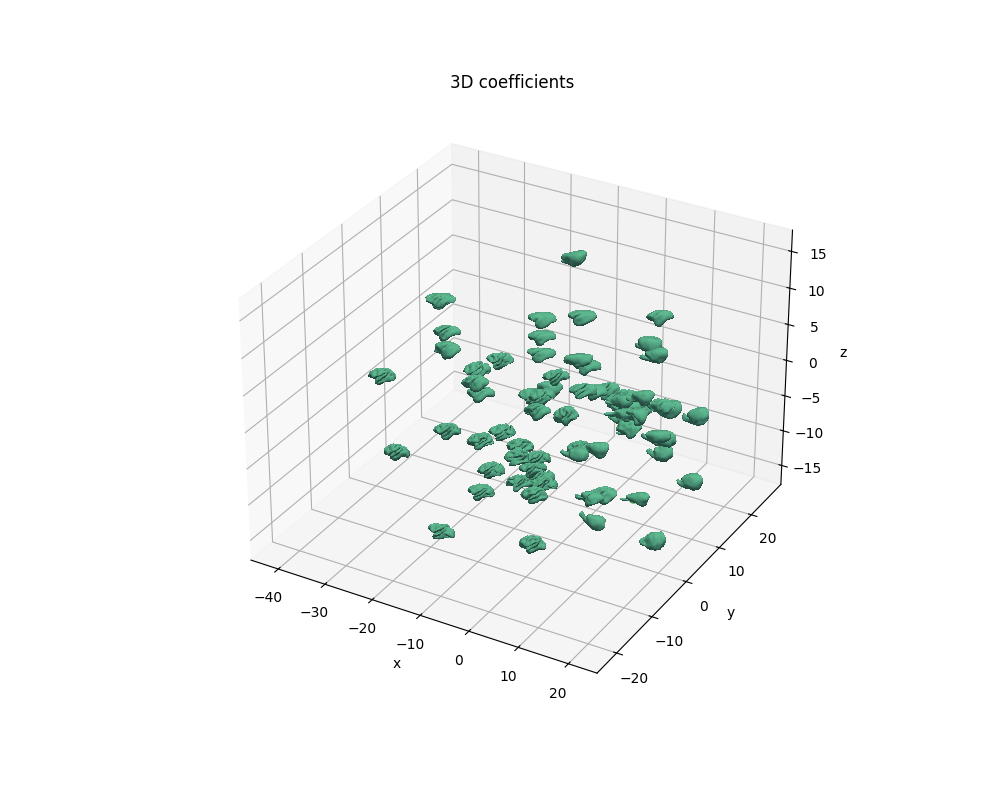

In [5]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import proj3d
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

#%matplotlib widget
%matplotlib ipympl

x = X_flattened[:, 0]
y = X_flattened[:, 1]
z = X_flattened[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, color="green", s=35)

ax.set_title("3D coefficients")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax2 = fig.add_subplot(111, frame_on=False)
ax2.axis("off")
#ax2.axis([0,1,0,1])

for xi, yi, zi, thumbnail in zip(x, y, z, thumbnails):
    x2, y2, _ = proj3d.proj_transform(xi, yi, zi, ax.get_proj())
    img = mpimg.imread(thumbnail)
    imagebox = OffsetImage(img, zoom=0.035)
    ab = AnnotationBbox(imagebox, (x2, y2), frameon=False)
    ax.add_artist(ab)
    
plt.show()

In [6]:
# altered class from https://stackoverflow.com/questions/48180327/3d-scatter-plot-with-images-as-annotations

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
import matplotlib.pyplot as plt
from matplotlib import offsetbox
import numpy as np

class ImageAnnotations3D():
    def __init__(self, xyz, imgs, ax3d,ax2d):
        self.xyz = xyz
        self.imgs = imgs
        self.ax3d = ax3d
        self.ax2d = ax2d
        self.annot = []
        for s,im in zip(self.xyz, self.imgs):
            x,y = self.proj(s)
            self.annot.append(self.image(im,[x,y]))
        self.lim = self.ax3d.get_w_lims()
        self.rot = self.ax3d.get_proj()
        self.cid = self.ax3d.figure.canvas.mpl_connect("draw_event",self.update)

        self.funcmap = {"button_press_event" : self.ax3d._button_press,
                        "motion_notify_event" : self.ax3d._on_move,
                        "button_release_event" : self.ax3d._button_release}

        self.cfs = [self.ax3d.figure.canvas.mpl_connect(kind, self.cb) \
                        for kind in self.funcmap.keys()]

    def cb(self, event):
        event.inaxes = self.ax3d
        self.funcmap[event.name](event)

    def proj(self, X):
        """ From a 3D point in axes ax1, 
            calculate position in 2D in ax2 """
        x,y,z = X
        x2, y2, _ = proj3d.proj_transform(x,y,z, self.ax3d.get_proj())
        tr = self.ax3d.transData.transform((x2, y2))
        return self.ax2d.transData.inverted().transform(tr)

    def image(self,arr,xy):
        """ Place an image (arr) as annotation at position xy """
        im = offsetbox.OffsetImage(arr, zoom=0.035)
        im.image.axes = ax
        ab = offsetbox.AnnotationBbox(im, xy, xybox=(-30., 30.),
                            xycoords='data', boxcoords="offset points",
                            arrowprops=dict(arrowstyle="->"))
        self.ax2d.add_artist(ab)
        return ab

    def update(self,event):
        if np.any(self.ax3d.get_w_lims() != self.lim) or \
                        np.any(self.ax3d.get_proj() != self.rot):
            self.lim = self.ax3d.get_w_lims()
            self.rot = self.ax3d.get_proj()
            for s,ab in zip(self.xyz, self.annot):
                ab.xy = self.proj(s)

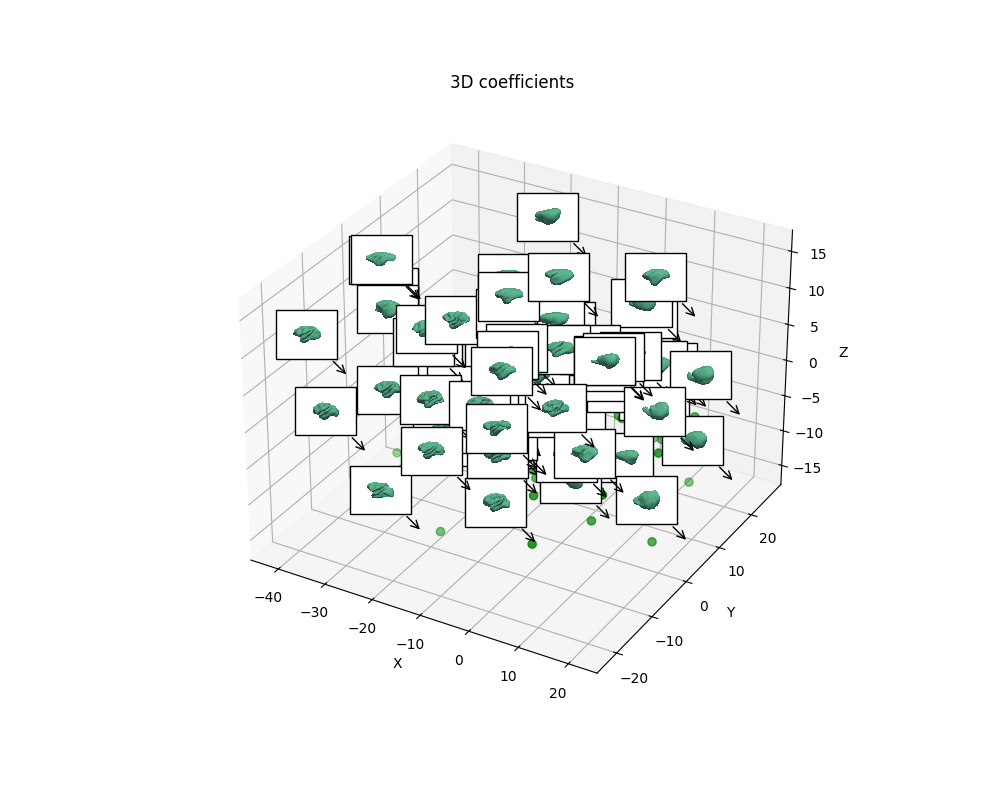

In [53]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import proj3d
import matplotlib.image as mpimg
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

#%matplotlib widget
%matplotlib ipympl

x = X_flattened[:, 0]
y = X_flattened[:, 1]
z = X_flattened[:, 2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, color="green", s=35)

ax.set_title("3D coefficients")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

ax2 = fig.add_subplot(111, frame_on=False)
ax2.axis("off")
ax2.axis([0,1,0,1])

loaded_imgs = [mpimg.imread(path) for path in thumbnails]

ia = ImageAnnotations3D(np.c_[x,y,z],loaded_imgs,ax, ax2 )


ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

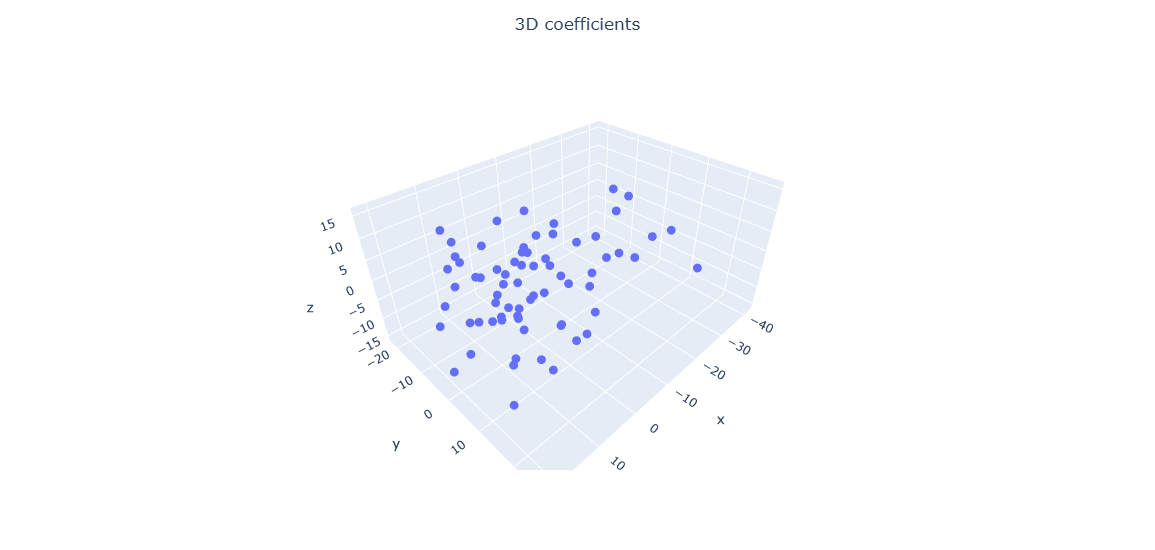

In [144]:
import plotly.express as px

fig = px.scatter_3d(x=X_flattened[:, 0], y=X_flattened[:, 1], z=X_flattened[:, 2], width=800, height=550)

fig.update_layout(title_text='3D coefficients', title_x=0.5)

fig.update_traces(marker=dict(size=5>
                             ),
                 selector=dict(mode='markers'))
fig.show()

## **K-means Clustering**

In [11]:
# 3D

from sklearn.cluster import KMeans

# within cluster sum of squares
WCSS = []

for i in range(1, 20):
    kmeans_pca = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans_pca.fit(X_flattened)
    WCSS.append(kmeans_pca.inertia_)

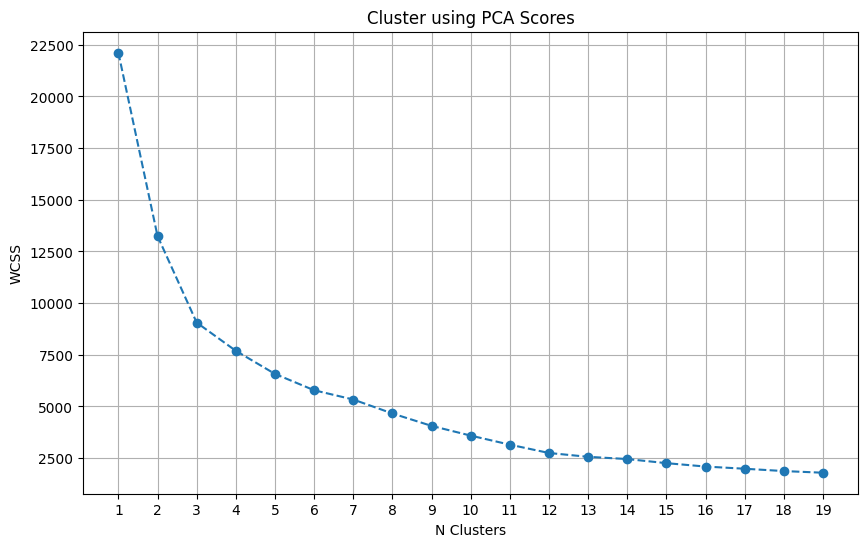

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1,20), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using PCA Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.xticks(range(1,20))
plt.show()

*Elbow point:* where the curve is smoothed, how many clusters to use

*what type of clustering to build tree?*
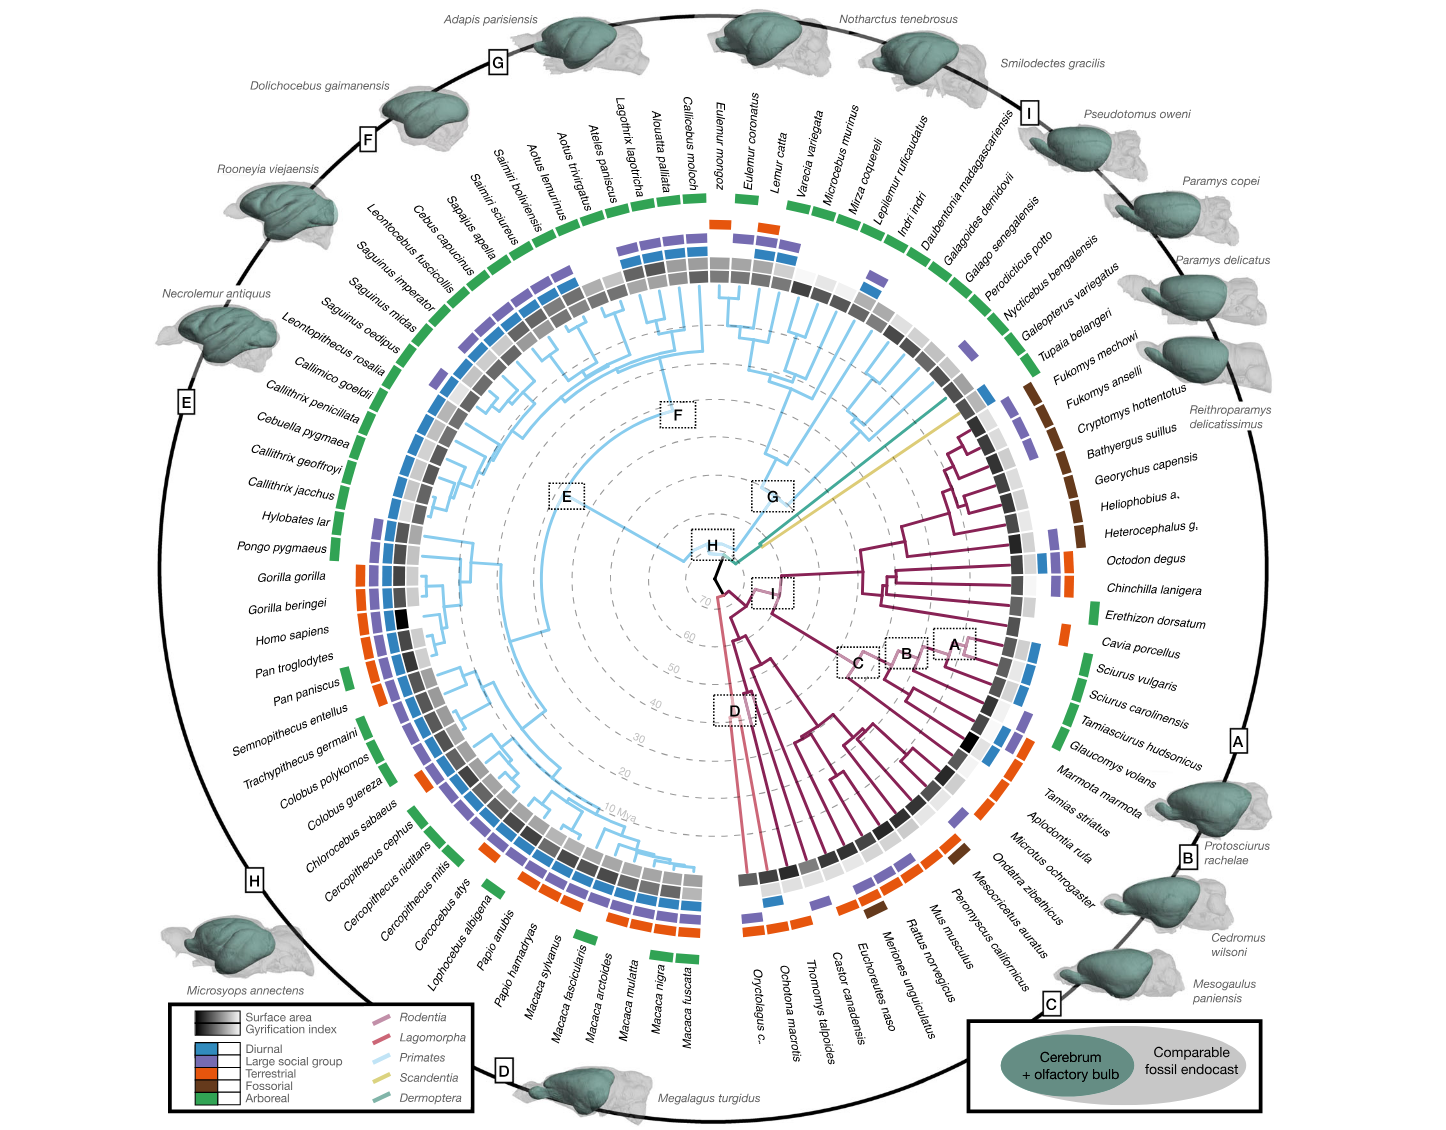